# 6. Logistic map
## Theoretical Background

We consider physical systems that evolve in type possibly chaotic.

In simple case this evolution can be characterized by one value $x \in \mathbb{R}$, and evolution is discrete in time. The evolution of system depends only on current state, so the next step state is a function of current state

$$x_{n+1} = f(x_n)$$

In case of logistic map with parameter r 
$$f_1(x) = 4 r x (1-x)$$
$$x \in [0, 1], r \in [0, 1]$$

And this type of evolution can describe for example population dynamics in case of limited resources. 

Other maps that will be use in this project are

$$f_2(x)=x \exp (4 r(1-x))$$ 
$$f_3(x)=r \sin (\pi x)$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

#switching latex fonts
plt.rcParams.update({
    "text.usetex" : True,
    "font.family" : "serif",
    "font.serif" : "Computer Modern",
    "text.latex.preamble" : r'\usepackage{amsmath} \usepackage{mathtext} \usepackage[english, russian]{babel}'
})

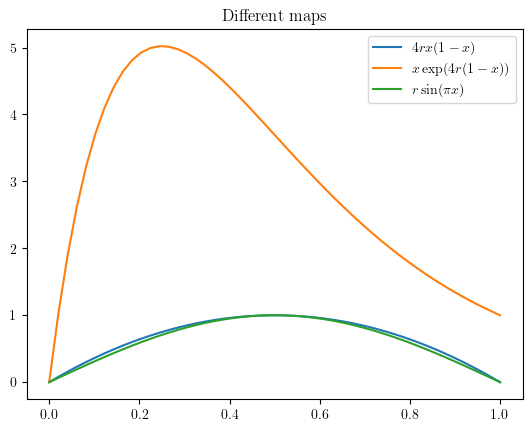

In [2]:

def f1(x, r=1):
    return 4*r*x*(1-x)

def f2(x, r=1):
    return x*np.exp(4*r*(1-x))

def f3(x, r=1):
    return r*np.sin(x * np.pi)

x = np.linspace(0, 1, 50)

for f, label in [(f1, "$4 r x (1-x)$"), (f2, "$x \exp (4 r(1-x))$"), (f3, "$r \sin (\pi x)$")]:
    y = f(x)
    plt.plot(x, y, label=label)
plt.legend()
plt.title("Different maps")
plt.show()

## Evolution simulation

For testing purposes I will visualize dynamics of the system together with the map. 

In [3]:
def compute_evolution(func, n_steps, x_0, **kwargs):
    hist = np.zeros(n_steps)
    hist[0] = x_0
    for i in range(1, n_steps):
        hist[i] = func(hist[i-1], **kwargs)
    return hist
r = 0.7
logist_1 = compute_evolution(f1, 200, 0.2, r=r)

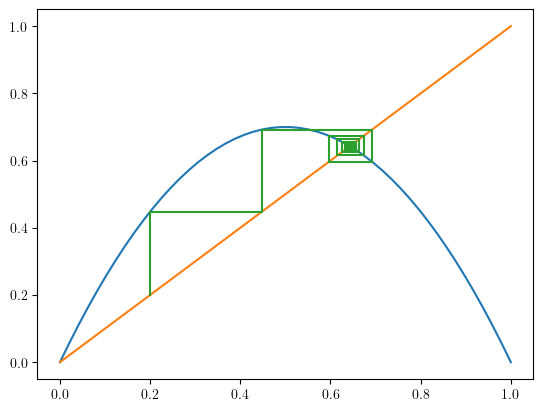

In [4]:
# evolution visualization
x = np.linspace(0, 1, 50)
y = f1(x, r=r)
plt.plot(x, y)  # map
plt.plot(x, x)  # y = x line

curve_x = np.repeat(logist_1, 2)[:-1]
curve_y =np.repeat(logist_1, 2)[1:]
# results in [x_0, x_0], [x_0, x_1], [x_1, x_1], [x_1, x_2], ...
plt.plot(curve_x, curve_y)
plt.show()

So the simulation does want is expected and thus works correctly.

## a) Visualization of evolution under given parameters 

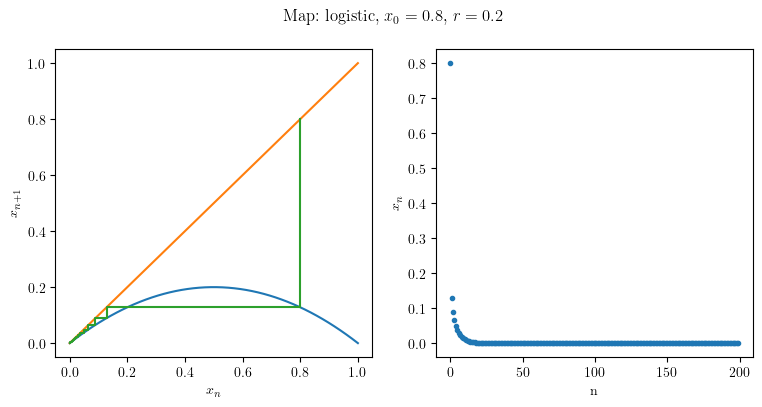

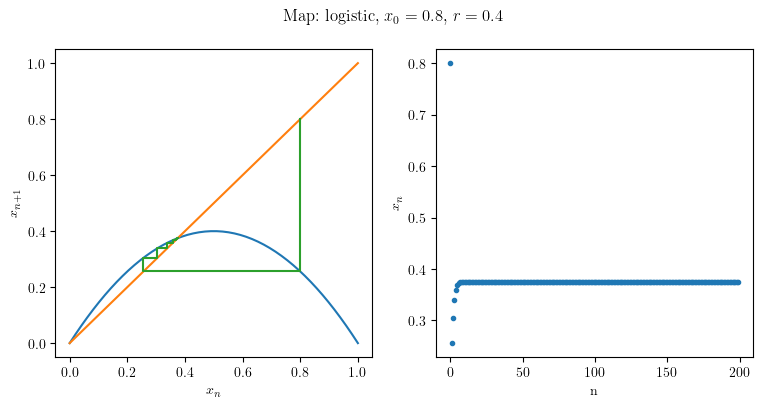

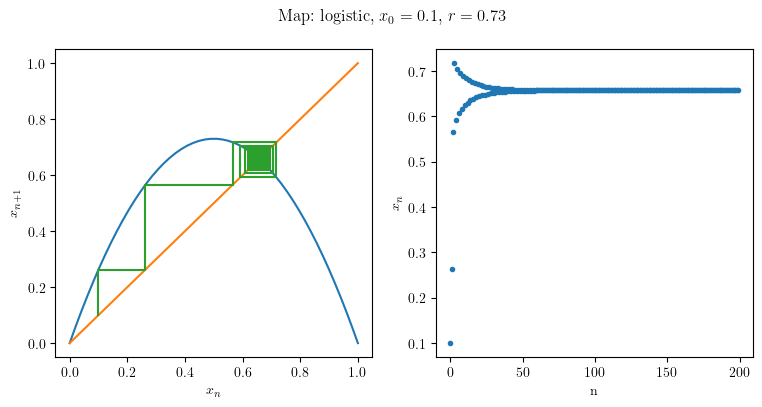

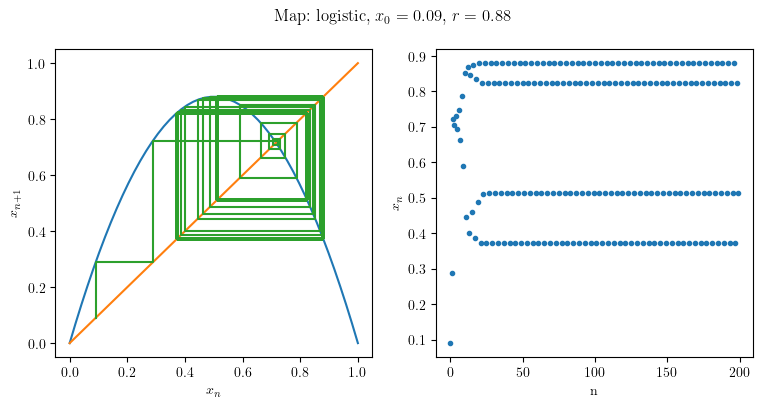

In [5]:
f = f1
map_name = "logistic"
for r, x_0 in [(0.2, 0.8), (0.4, 0.8), (0.73, 0.1), (0.88, 0.09)]:
    plt.figure(figsize=(9, 4))
    plt.subplot(1, 2, 1)
    plt.suptitle(f"Map: {map_name}, $x_0 = {x_0}$, $r = {r}$")
    x_n = compute_evolution(f, 200, x_0, r=r)

    x = np.linspace(0, 1, 50)
    y = f(x, r=r)
    plt.plot(x, y)  # map
    plt.plot(x, x)  # y = x line
    curve_x = np.repeat(x_n, 2)[:-1]
    curve_y = np.repeat(x_n, 2)[1:]
    # results in [x_0, x_0], [x_0, x_1], [x_1, x_1], [x_1, x_2], ...
    plt.plot(curve_x, curve_y)
    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")


    plt.subplot(1, 2, 2)
    plt.plot(x_n, ".")
    plt.xlabel("n")
    plt.ylabel("$x_n$")
    plt.show()

#### Observations
As was discussed in class, some parameters $r$ lead to convergence to fixed state x, while others show chaotic behavior with semi-periodic trajectories. 

Also for $r < 0.25$, $x=0$ is stable point.\
For $0.25 < r < 0.75$, $x = 1 -1/(4r)$ (second interception point) is stable. \
For $r > 0.75$ non of the fixed points are stable -> bifurcations

## b) The same with other maps

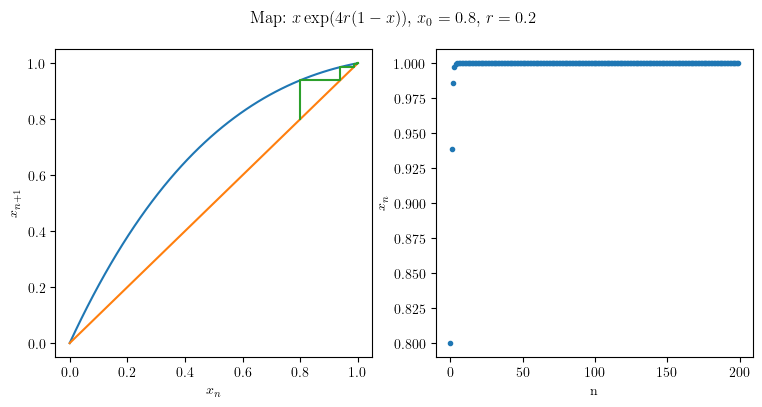

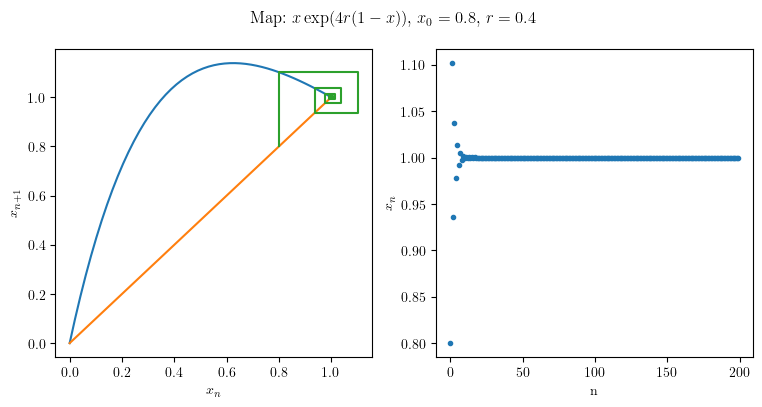

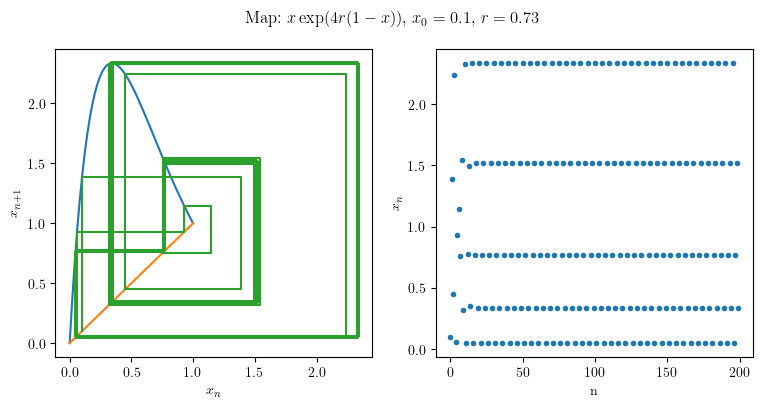

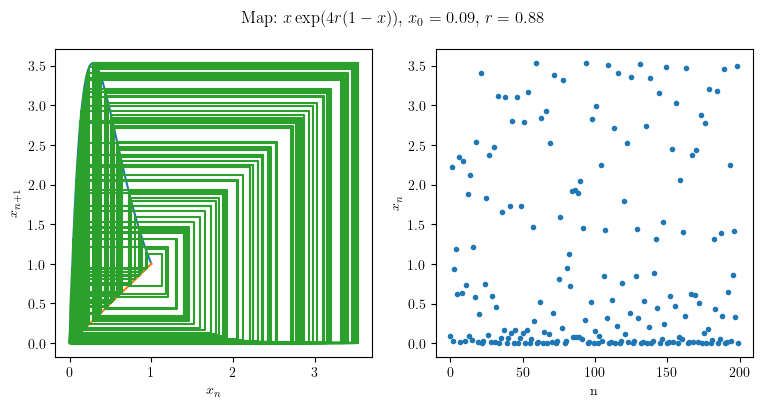

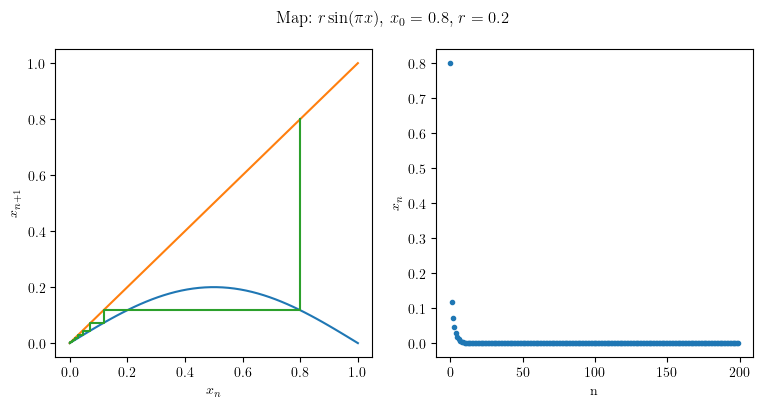

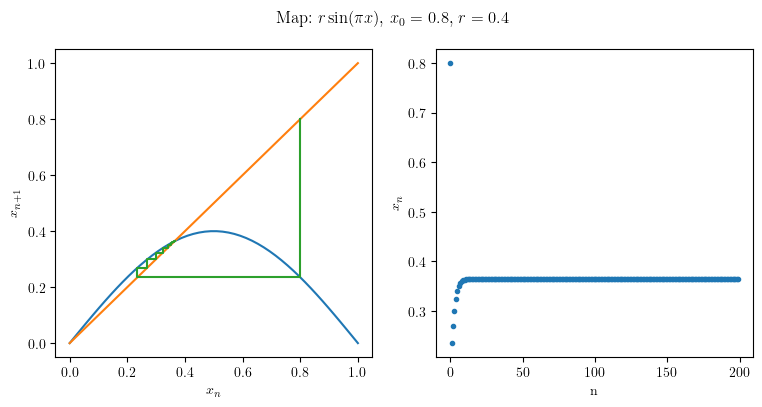

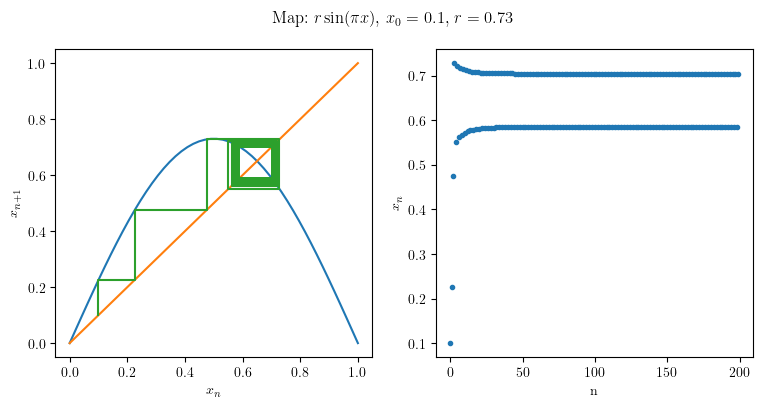

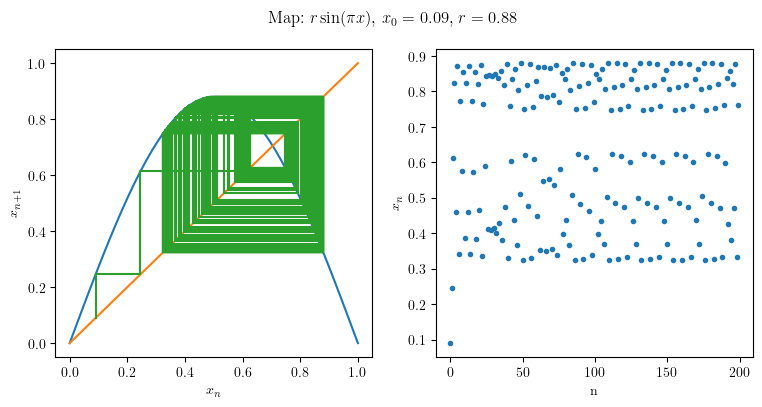

In [6]:
def plot_evolution(f, x_0, r, map_name):
        plt.figure(figsize=(9, 4))
        plt.subplot(1, 2, 1)
        plt.suptitle(f"Map: {map_name}, $x_0 = {x_0}$, $r = {r}$")
        x_n = compute_evolution(f, 200, x_0, r=r)

        x = np.linspace(0, 1, 50)
        y = f(x, r=r)
        plt.plot(x, y)  # map
        plt.plot(x, x)  # y = x line
        curve_x = np.repeat(x_n, 2)[:-1]
        curve_y = np.repeat(x_n, 2)[1:]
        # results in [x_0, x_0], [x_0, x_1], [x_1, x_1], [x_1, x_2], ...
        plt.plot(curve_x, curve_y)
        plt.xlabel("$x_n$")
        plt.ylabel("$x_{n+1}$")


        plt.subplot(1, 2, 2)
        plt.plot(x_n, ".")
        plt.xlabel("n")
        plt.ylabel("$x_n$")
        plt.show()

for f, map_name in [(f2, "$x \exp (4 r(1-x))$"), (f3, "$r \sin (\pi x)$")]:
    for r, x_0 in [(0.2, 0.8), (0.4, 0.8), (0.73, 0.1), (0.88, 0.09)]:
        plot_evolution(f, x_0, r, map_name)

## c) Divergence speed in chaotic mode


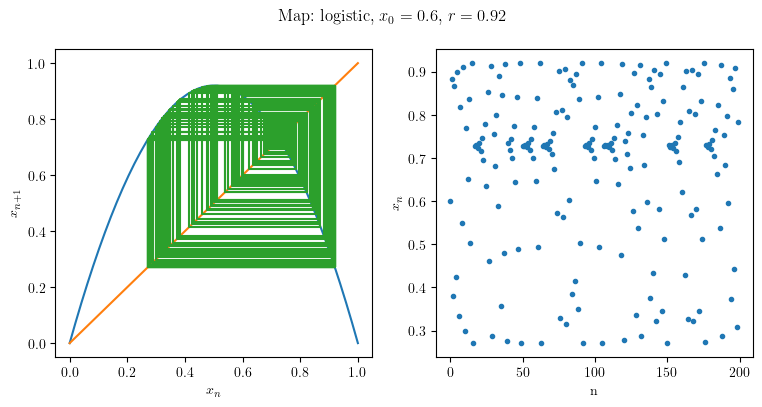

In [7]:
dx_0 = 1e-5
r = 0.92
x_0 = 0.6
plot_evolution(f1, x_0, r, "logistic")
x_n = compute_evolution(f1, 200, x_0, r=r)
x_n_prime = compute_evolution(f1, 200, x_0+dx_0, r=r)

Text(0.5, 1.0, 'Divergence speed plot')

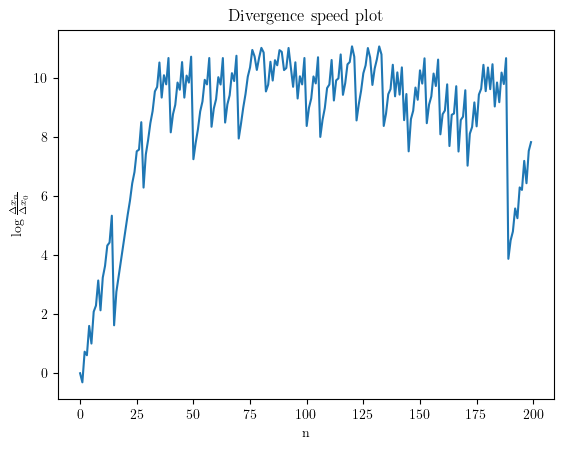

In [8]:
delta_x = np.abs(x_n - x_n_prime)
diverg = np.log(delta_x/dx_0)

plt.plot(diverg)
plt.xlabel("n")
plt.ylabel(r"$\log \frac{\Delta x_n}{\Delta x_0}$")
plt.title("Divergence speed plot")

In the beginning the growth of trajectories difference in log scale looks linear. This indicates that trajectories diverge exponentially fast and thus chaotic behavior takes place. 

Exactly this we would expect as $r = 0.92 > r_{\infty} \approx 0.892$

### d) Lyapunov Exponent computation

Divergence of the trajectories can be characterized by the Lyapunov Exponent.

Let $\varepsilon_0$ be initial small distance from the fixed point ($x^* = f(x^*)$)

then

$$ \varepsilon_{n+1} \approx \varepsilon_n \cdot e^{\lambda}= \varepsilon_n \cdot f'(x^*) $$ 
where $\lambda$ -- is Lyapunov Exponent.

If $\lambda > 0$, trajectories diverge(chaos), if  $\lambda < 0$, trajectories converge.


For our maps we can estimate Lyapunov Exponent numerically:\
$$\lambda \approx \frac{1}{n} \sum_{i=0}^{n-1} \log |f'(x_i)|$$

$$ f'_1(x) = 4r(1 - 2x) $$

$$f'_2(x)= \exp (4 r(1-x)) -4r x \exp (4 r(1-x))$$ 

$$ f'_3(x) = \pi r \cos(\pi x) $$

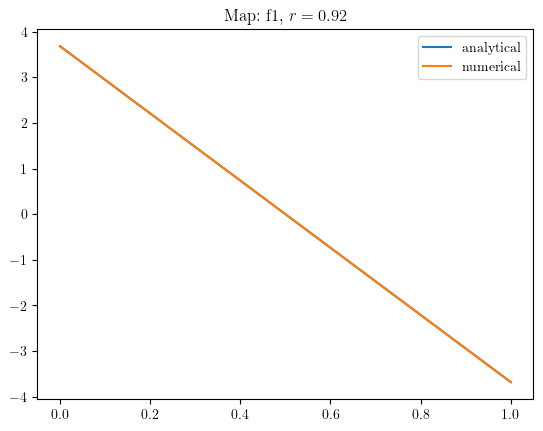

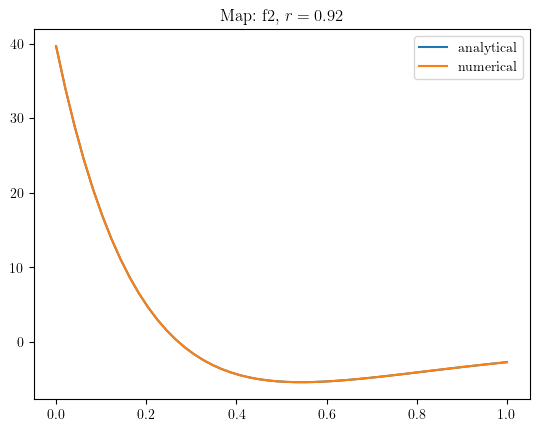

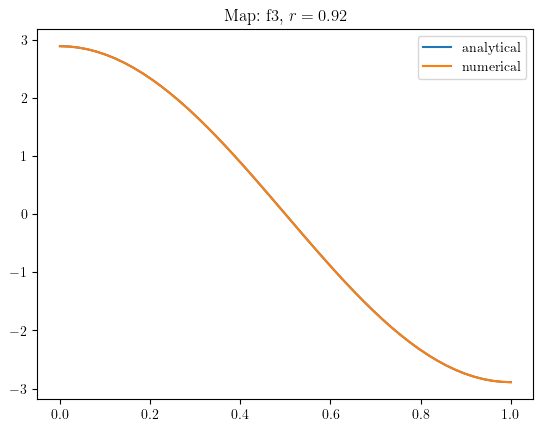

In [9]:
def f1_der(x, r):
    return 4 * r * (1 - 2*x)
def f2_der(x, r):
    return np.exp(4 * r * (1 - x)) - 4 * r * x * np.exp(4 * r * (1 - x))
def f3_der(x, r):
    return np.pi * r * np.cos(np.pi * x)

# compare with numerical derivatives
dx = 1e-5
r = 0.92
for f, f_der in [(f1, f1_der), (f2, f2_der), (f3, f3_der)]:
    x = np.linspace(0, 1, 50)
    y = f_der(x, r)
    fx_plus = f(x+dx, r)
    fx = f(x, r)
    y_num = (fx_plus - fx) / dx
    plt.title(f"Map: {f.__name__}, $r = {r}$")
    plt.plot(x, y, label="analytical")
    plt.plot(x, y_num, label="numerical")
    plt.legend()
    plt.show()

In [10]:
def compute_lyapunov(func, x_0, r_set, n, deriv_func):
    lyap = []
    for r in r_set:
        x_n = compute_evolution(func, n, x_0, r=r)
        h = np.log(np.abs(deriv_func(x_n, r)))
        lyap.append(np.mean(h))
    return lyap

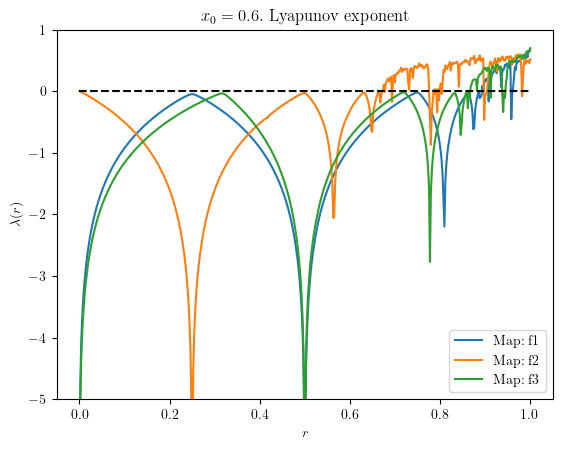

In [11]:
for f, f_der in [(f1, f1_der), (f2, f2_der), (f3, f3_der)]:
    x_0 = 0.6
    r_set = np.linspace(0 + 1e-9, 1 - 1e-9, 500)
    n = 200
    lyap = compute_lyapunov(f, x_0, r_set, n, f_der)
    plt.title(f"$x_0 = {x_0}$. Lyapunov exponent")
    plt.plot(r_set, lyap, label=f"Map: {f.__name__}")
plt.legend()
plt.xlabel("$r$")
plt.ylabel("$\lambda(r)$")
plt.ylim(-5, 1)
plt.plot([0, 1], [0, 0], "k--")
plt.show()


In [12]:
x_0 = 0.6
r_set = np.linspace(0 + 1e-9, 1 - 1e-9, 500)
n = 200
lyap = compute_lyapunov(f1, x_0, r_set, n, f1_der)
r_inf = np.min(r_set[np.array(lyap) > 0])
print("R critical for the logistic map is", round(r_inf, 3))

R critical for the logistic map is 0.894


Plots of Lyapunov constants look good. For the logistic map predicted $R_\infty$ gives a chaotic behavior.